<a href="https://colab.research.google.com/github/PriyankaMath/CMPE258-Assignment3/blob/main/a)Numpy_DeepNeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 layer Deep Neural Network for non linear Relu using only Numpy

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Prepare Data

In [ ]:
# 3 Dimension non-linear input data

n = 200
d = 3
x = np.random.uniform(-1, 1, (n, d))

weights_true = np.array([[2, 1,-1],[3,0,-1],]).T
bias_true = np.array([0.5,0.1])

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

x: (200, 3), weights: (3, 2), bias: (2,), y: (200, 2)


### Visualizing the data generated using TSNE

In [ ]:
from sklearn.manifold import TSNE
view = TSNE(n_components=2, n_jobs=5).fit_transform(x)
view.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(200, 2)

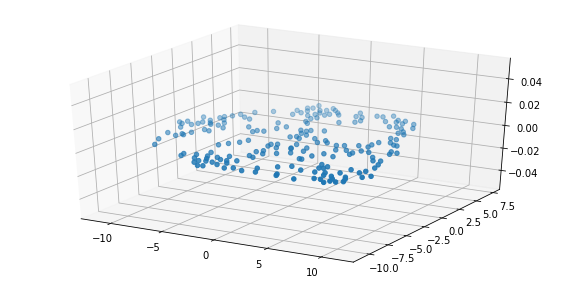

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
#y_pred = y_pred.astype('int')
fig = plt.figure(figsize=(10,5))
tsne = fig.add_subplot(111, projection='3d')
tsne.scatter(*zip(*view))
plt.show()

In [ ]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
    self.bias = np.zeros(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    #output = (x ** 2) @ weights_true + x @ weights_true + bias_true
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

### Adding non-linearity: Relu

In [ ]:
# In order to learn non-linear functions, we need non-linearities in our model.

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


###Train our new non linear model

In [ ]:
class Model:
  def __init__(self, input_dim, num_hidden, output_dim):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu1 = Relu()
    self.relu2 = Relu()
    self.linear2 = Linear(num_hidden, output_dim)
  
  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    r2 = self.relu2(r1)
    l2 = self.linear2(r2)
    return l2
  
  def backward(self, output_gradient):
    linear2_gradient = self.linear2.backward(output_gradient)
    relu2_gradient = self.relu2.backward(linear2_gradient)
    relu1_gradient = self.relu1.backward(relu2_gradient)
    linear1_gradient = self.linear1.backward(relu1_gradient)
    # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear2.update(lr)
    self.linear1.update(lr)

loss = MSE()
model = Model(d, 10,output_dim=2)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(loss_value)
model.backward(loss_gradient)
#plot_3d(x, y_true, y_pred)

3.3487377580811515


array([[ 1.00043957e-03, -4.12512742e-03,  6.67573496e-04],
       [ 3.63838299e-04,  5.31709979e-04, -4.18354382e-03],
       [-1.02782538e-02,  8.72958668e-03, -9.59261628e-03],
       [-5.29027271e-02, -1.32800365e-02,  1.49335417e-01],
       [-1.36715295e-03,  2.22019318e-04, -3.98042970e-03],
       [-2.21020582e-02,  2.38805454e-02,  5.55346408e-02],
       [ 1.64500439e-03, -9.18560368e-03,  1.03824178e-02],
       [-3.43991810e-03,  1.48459798e-03, -7.59436204e-03],
       [-3.20438409e-02, -1.23540901e-02,  8.80894064e-02],
       [-1.43596560e-02, -3.76532866e-02, -2.58494754e-02],
       [-1.11995293e-02,  3.32677507e-03,  2.97051331e-03],
       [ 2.67662980e-03, -1.44032500e-03, -1.42473841e-02],
       [ 2.56389025e-03,  2.33717599e-03, -1.26596405e-04],
       [ 5.55838846e-03, -5.48636149e-02,  2.70417546e-02],
       [-3.29964669e-03,  1.15837422e-02, -6.33937212e-03],
       [-8.45761460e-03, -1.74579157e-03, -1.95838763e-02],
       [-2.60895335e-02,  3.05453996e-02

In [ ]:
from typing import Callable

def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)

### Initializing non-linear and loss for three dimensional data
3-d input and 2-d output with 2 hidden layers, 10 neurons for hidden layers

In [ ]:
loss = MSE()
nonlinear = Model(3,20,2)
y_pred = nonlinear(x)
print(x.shape, weights_true.shape, y_true.shape, y_pred.shape)
print(loss(y_pred,y_true))

(200, 3) (3, 2) (200, 2) (200, 2)
4.498234357776024


In [ ]:
fit(x, y_true, model=nonlinear, loss=loss, lr=0.1, num_epochs=400)
y_pred = nonlinear(x)

Epoch 0, loss 4.498234357776024
Epoch 1, loss 2.2375913427294267
Epoch 2, loss 1.3858791880122914
Epoch 3, loss 0.9588808656889478
Epoch 4, loss 0.7288855172551081
Epoch 5, loss 0.5947100592785891
Epoch 6, loss 0.5087011466800518
Epoch 7, loss 0.44775278538413316
Epoch 8, loss 0.4009934681161021
Epoch 9, loss 0.36327247387214634
Epoch 10, loss 0.3309839478279194
Epoch 11, loss 0.30273976550372944
Epoch 12, loss 0.27795218075532463
Epoch 13, loss 0.25587799781599224
Epoch 14, loss 0.23605526939765945
Epoch 15, loss 0.21823450475360903
Epoch 16, loss 0.20248594859928665
Epoch 17, loss 0.18833839671742506
Epoch 18, loss 0.17557125849097183
Epoch 19, loss 0.1639615968899469
Epoch 20, loss 0.15339679300668765
Epoch 21, loss 0.14381377385078628
Epoch 22, loss 0.13509077021712187
Epoch 23, loss 0.12712037106598156
Epoch 24, loss 0.11982166612819166
Epoch 25, loss 0.11312694978469492
Epoch 26, loss 0.10699606151759734
Epoch 27, loss 0.10135060970726244
Epoch 28, loss 0.09612459884748102
Epoch 

In [ ]:
print(f'x: {x.shape}, y: {y_true.shape}, y1: {y_pred.shape}')
print(y_true)
print(y_pred)

x: (200, 3), y: (200, 2), y1: (200, 2)
[[ 8.33766061e-01 -1.12158728e+00]
 [-4.81887185e-02 -2.08640293e+00]
 [ 4.88235321e-01 -1.89867808e-01]
 [ 4.63503728e+00  5.07914315e+00]
 [-5.62983974e-01 -1.26309183e+00]
 [ 6.45849241e-01  1.04438245e+00]
 [ 1.85126749e+00 -3.35510282e-01]
 [-6.38139277e-01 -1.34949734e+00]
 [ 2.03106334e+00  1.34206855e+00]
 [ 2.53961876e+00  3.17630196e+00]
 [ 8.33383753e-02 -3.99709699e-01]
 [ 7.37438373e-01  7.48178341e-01]
 [ 1.93612066e+00 -9.34290181e-02]
 [ 3.00015868e+00  4.06149849e+00]
 [ 8.38561605e-02 -6.01042655e-01]
 [-8.00208385e-01 -1.06578819e+00]
 [ 5.28027128e-01 -3.93857301e-01]
 [ 2.25489616e+00  3.08469974e+00]
 [ 8.07460977e-02 -2.55003367e-01]
 [ 3.61161318e+00  4.19588860e+00]
 [ 1.42677535e+00  4.98921921e-01]
 [ 1.67711873e+00  1.56334860e+00]
 [ 1.42093069e-01 -1.97979815e-01]
 [ 3.73636942e-01 -6.99631408e-01]
 [ 1.76168287e+00  3.24431376e+00]
 [ 1.85279012e+00  5.84862926e-01]
 [ 2.00486319e+00  2.95824207e+00]
 [ 3.97685165e+0

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Text(0, 0.5, 't-SNE-2')

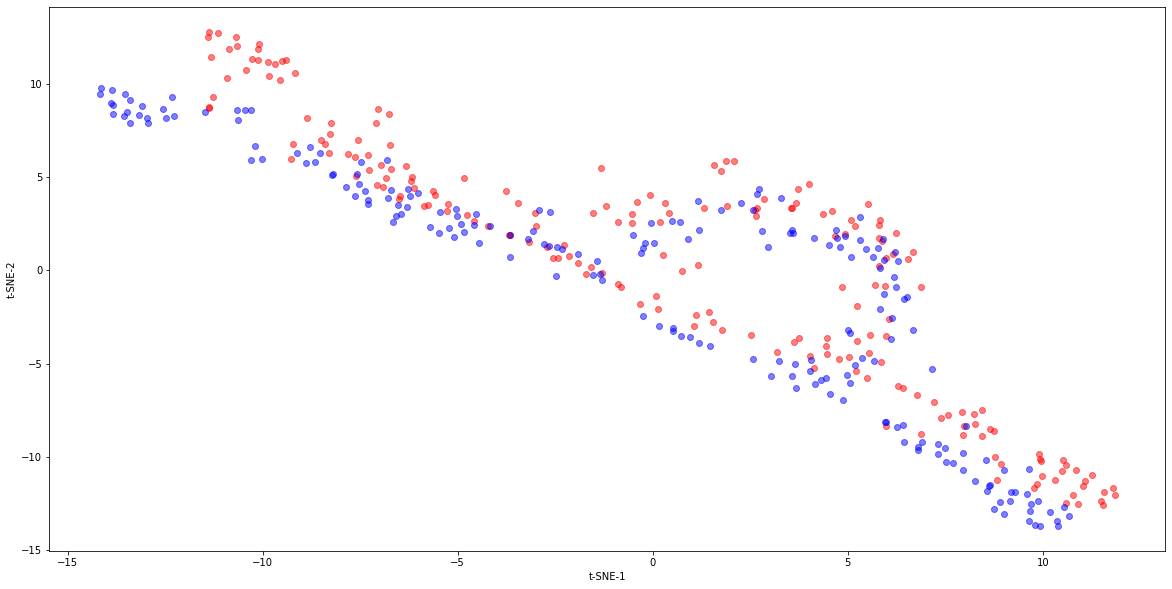

In [ ]:
 from sklearn.manifold import TSNE
 view_true = TSNE(n_components=2, random_state=0).fit_transform(y_true)
 view_pred = TSNE(n_components=2, random_state=0).fit_transform(y_pred)
 #y_pred = y_pred.astype('int')
 plt.figure(figsize=(20,10))
 plt.scatter(view_true[:,0], view_true[:,1], c='r', alpha=0.5)
 plt.scatter(view_pred[:,0], view_pred[:,1], c='b', alpha=0.5)
 plt.xlabel('t-SNE-1')
 plt.ylabel('t-SNE-2')